<a href="https://colab.research.google.com/github/shubham14yadav/Hypothesis-Testing/blob/main/Hypothesis_Testing_Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset='/content/drive/MyDrive/dataset/insurance.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
df=pd.read_csv(dataset)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe().astype(int)

,age,bmi,children,charges
count,1338,1338,1338,1338
mean,39,30,1,13270
std,14,6,1,12110
min,18,15,0,1121
25%,27,26,0,4740
50%,39,30,1,9382
75%,51,34,2,16639
max,64,53,5,63770


Text(0.5, 1.0, 'Charges Distribution')

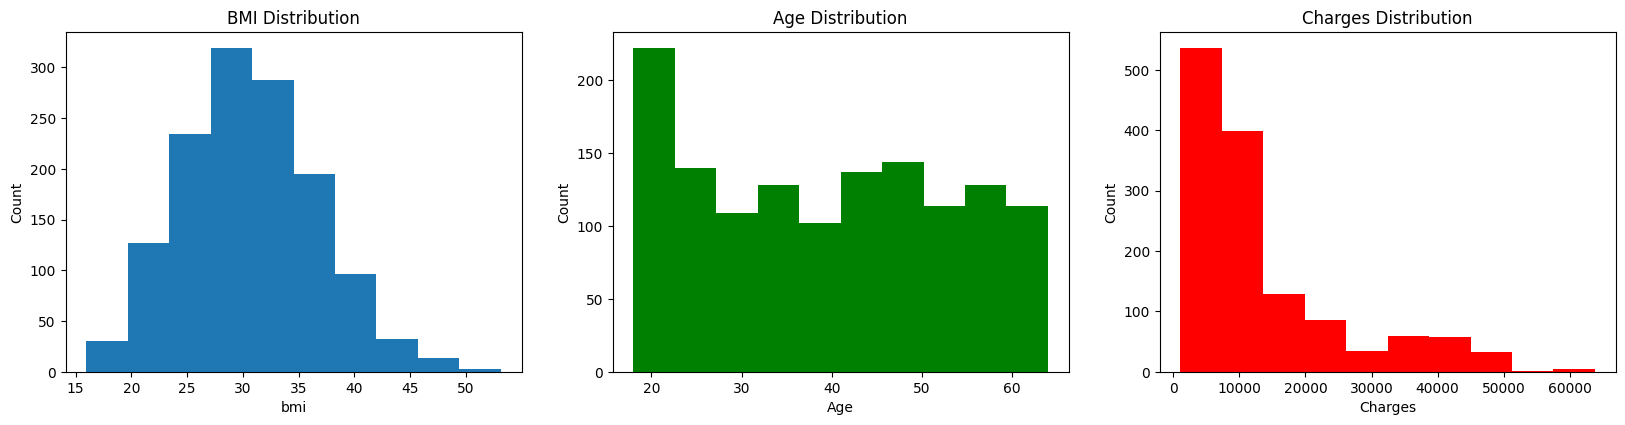

In [9]:
#Distribution Plots
#BMI
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['bmi'])
plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('BMI Distribution')

#AGE
plt.subplot(3,3,2)
plt.hist(df['age'],color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

#Charges
plt.subplot(3,3,3)
plt.hist(df['charges'],color='red')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Charges Distribution')


In [10]:
pd.DataFrame({'Skewness':[stats.skew(df['bmi']),stats.skew(df['age']),stats.skew(df['charges'])]},index=['BMI','Age','Charges'])

,Skewness
BMI,0.283729
Age,0.055610
Charges,1.514180


#### BMI attributes shows a normal distribution
#### Age attributes shows a uniform distribution, some skewness can be observed
#### Charges attributes shows right skewed or positive skewed distribution

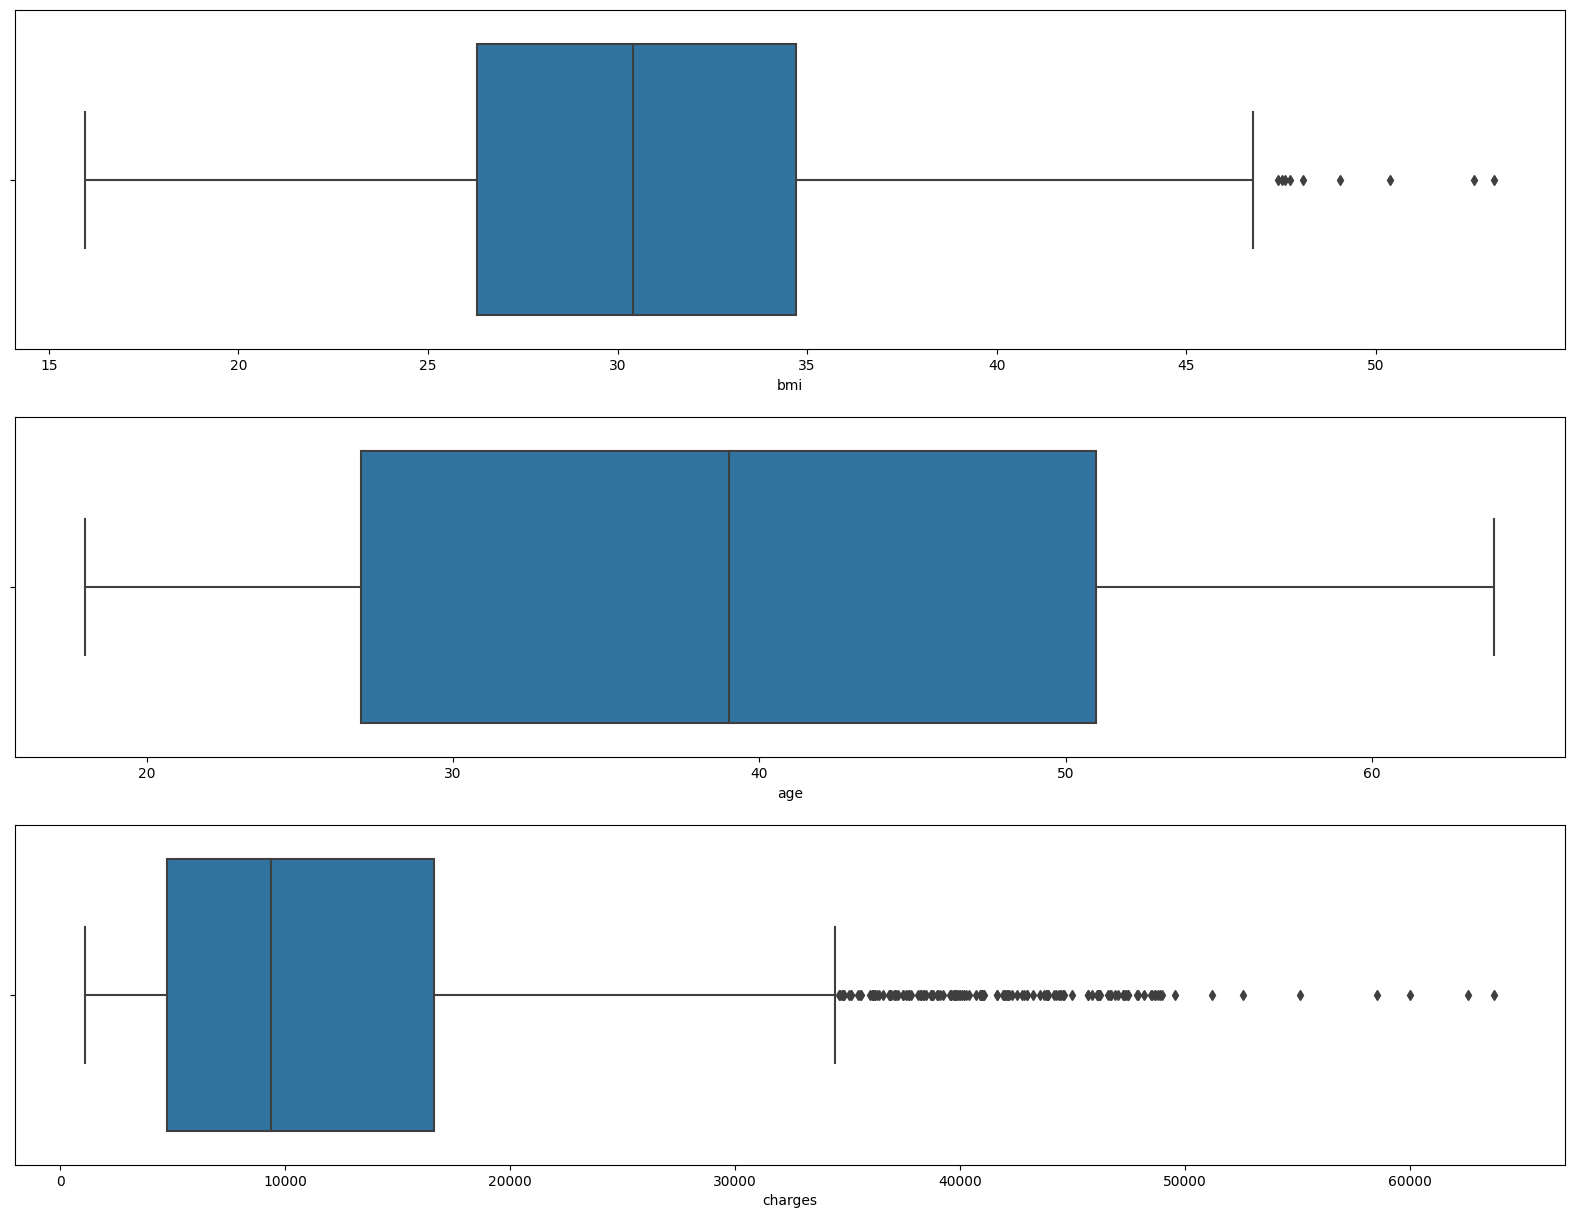

In [11]:
#Outlier detection

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df['bmi'])

plt.subplot(3,1,2)
sns.boxplot(x=df['age'])

plt.subplot(3,1,3)
sns.boxplot(x=df['charges'])
plt.show()

#### BMI has outliers
#### Age has not no outliers
#### Charges has a lot of outliers

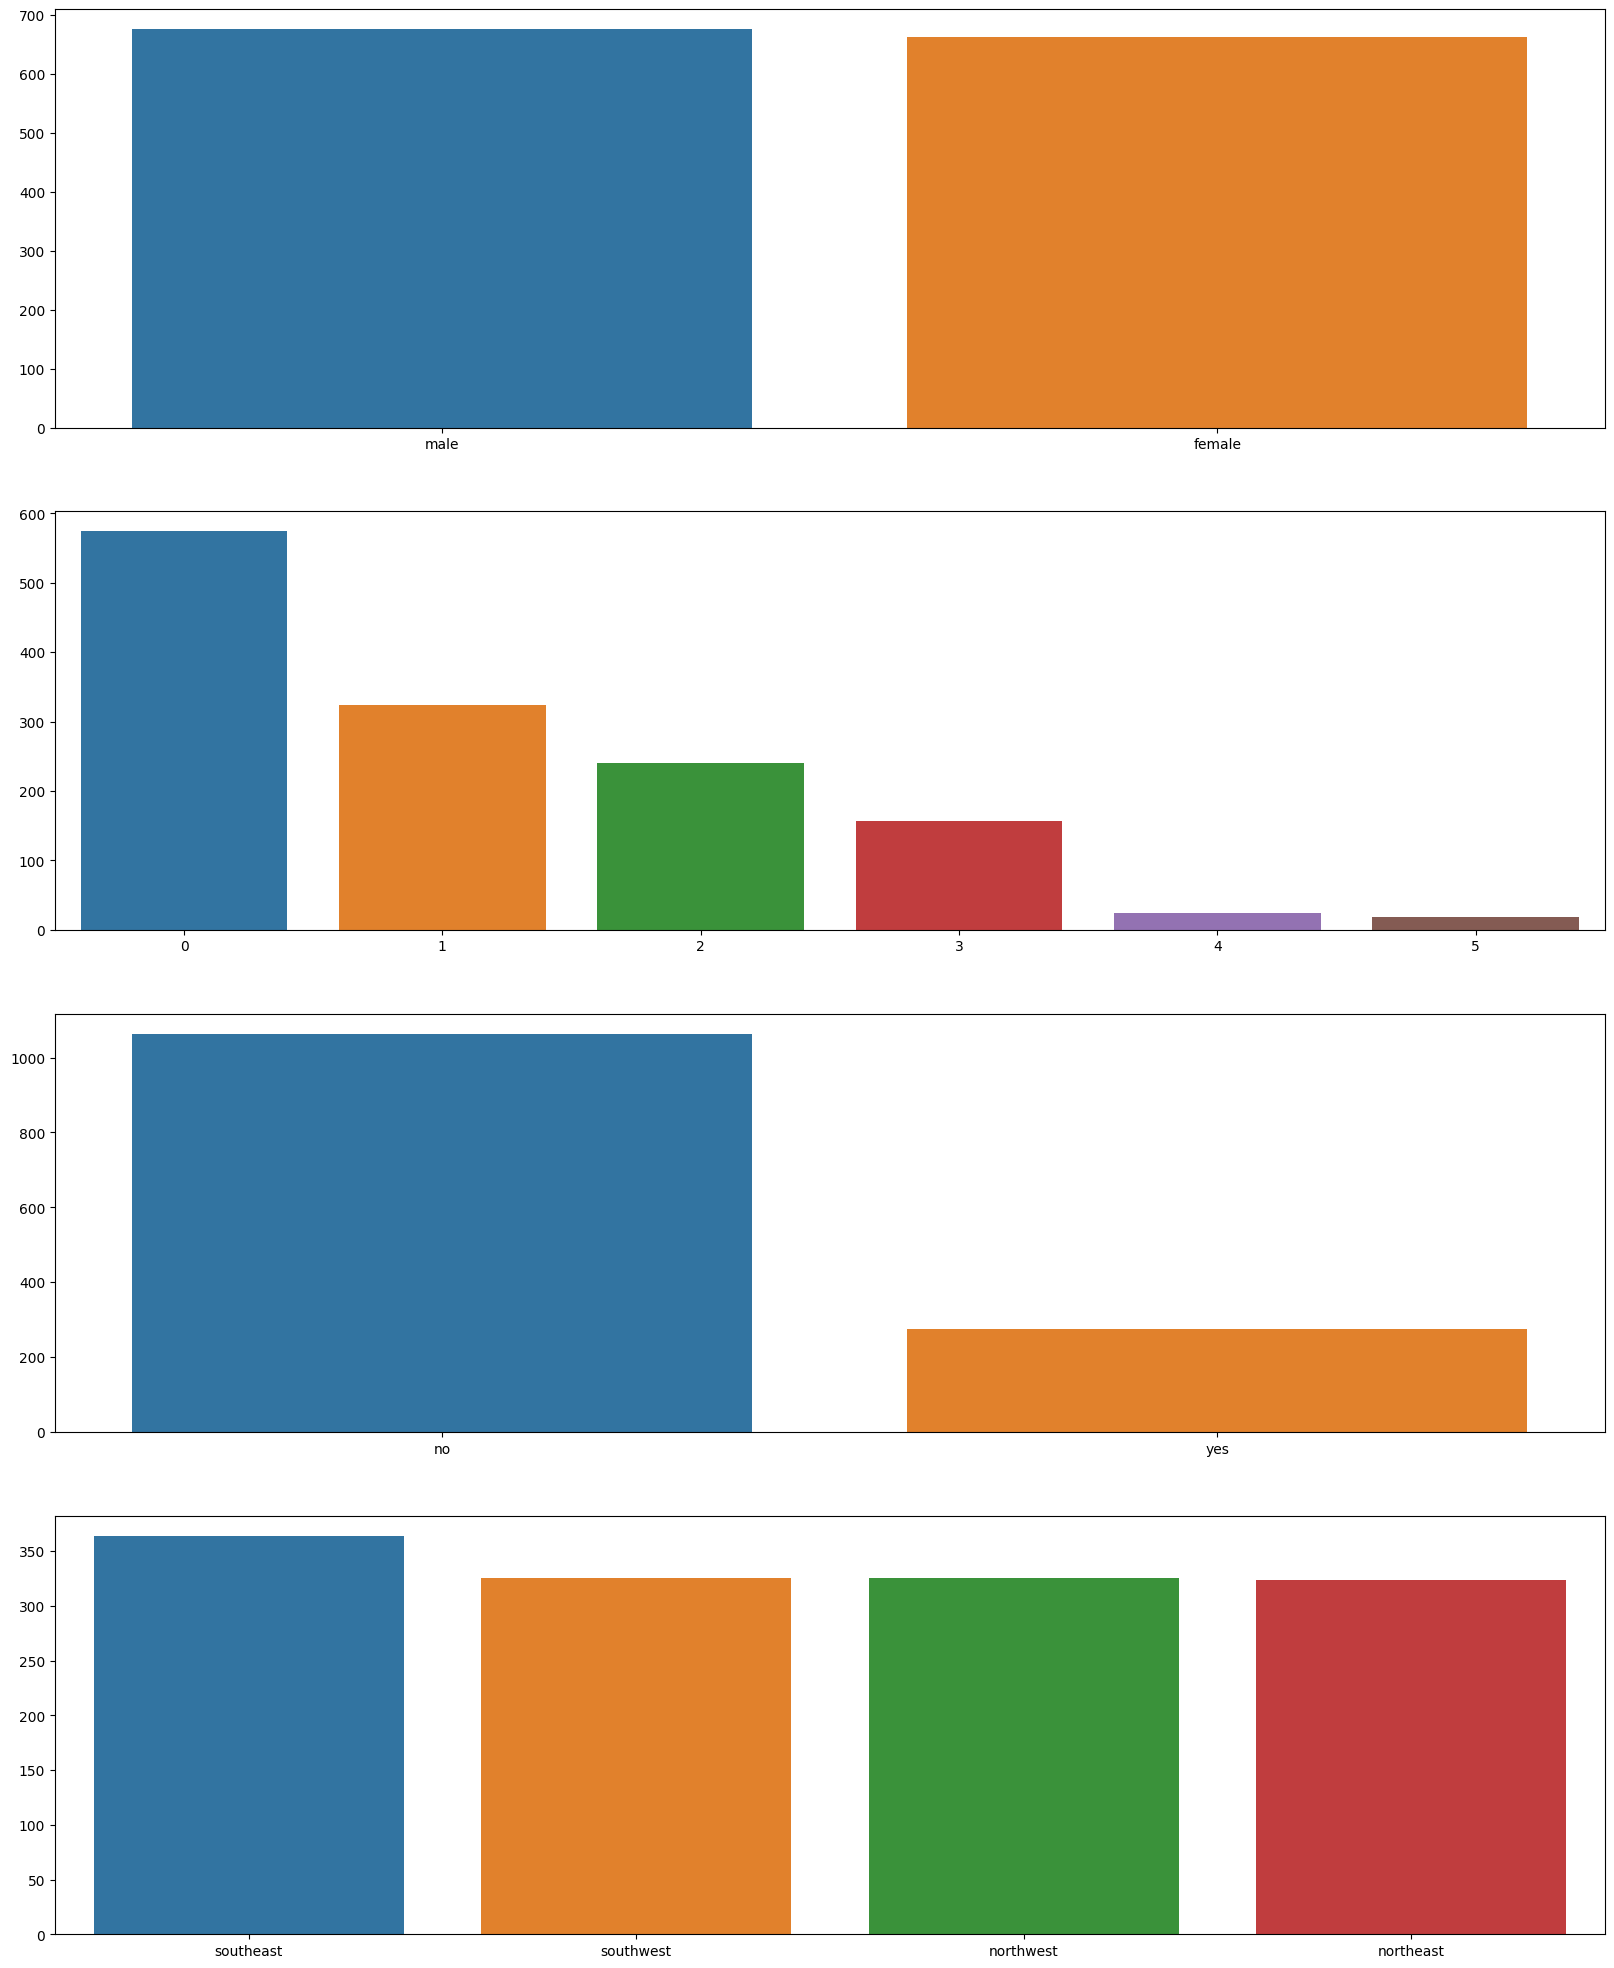

In [12]:
plt.figure(figsize= (20,25))
plt.subplot(4,1,1)
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts().values)

plt.subplot(4,1,2)
sns.barplot(x=df['children'].value_counts().index,y=df['children'].value_counts().values)

plt.subplot(4,1,3)
sns.barplot(x=df['smoker'].value_counts().index,y=df['smoker'].value_counts().values)

plt.subplot(4,1,4)
sns.barplot(x=df['region'].value_counts().index,y=df['region'].value_counts().values)
plt.show()

#### Correlations
#### Converting categorical varibales into numerical for analysis

In [13]:
df_new = df.copy()

In [14]:
region={'southwest':0,'southeast':1,'northwest':2,'northeast':3}

In [15]:
df_new['sex']=df_new['sex'].apply(lambda x :1 if x=='male' else 0)
df_new['region']=df_new['region'].map(region)
df_new['smoker']=df_new['smoker'].apply(lambda x :1 if x=='yes' else 0)

In [16]:
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [17]:
print(df_new['sex'].unique(),df_new['smoker'].unique(),df_new['region'].unique())

[0 1] [1 0] [0 1 2 3]


In [18]:
corr_matrix=df_new.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<Axes: >

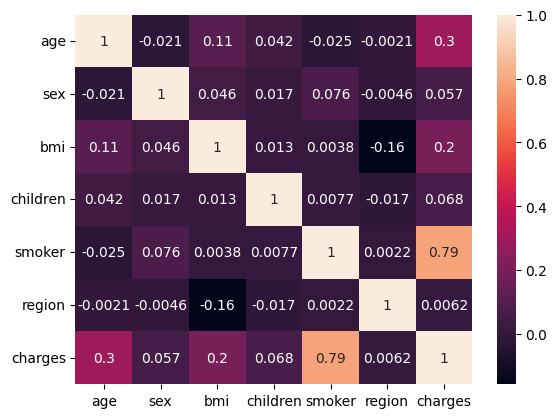

In [19]:
sns.heatmap(corr_matrix,annot=True)

#### Smoking and charges show strong correlation

#### Hypothesis testing
#### Do charges of people who smoke differ significantly from the people who don't?

In [20]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

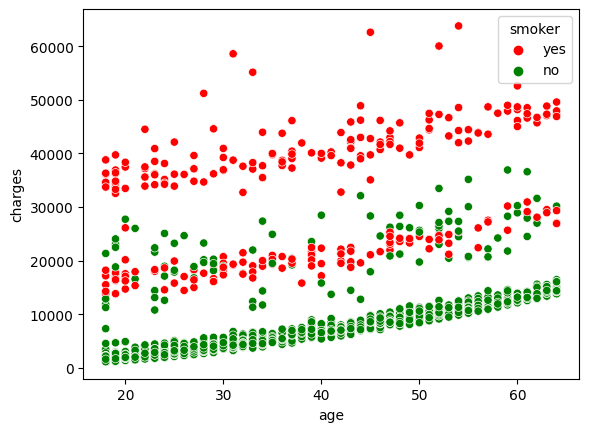

In [21]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'],palette=['red','green'])

In [22]:
H0 = 'Charges of non-smoker and smoker are same'
Ha= 'Charges of non-smoker and smoker are not same'
x=np.array(df[df['smoker']=='yes']['charges'])
y=np.array(df[df['smoker']=='no']['charges'])
t_value,p_value=stats.ttest_ind(x,y)
if p_value <= 0.05:
  print('{} because the  (p_value){}<=0.05'.format(Ha,p_value))
else:
  print('{} because the  (p_value){}>=0.05'.format(H0,p_value))

Charges of non-smoker and smoker are not same because the  (p_value)8.271435842179102e-283<=0.05


#### Does BMI of males differ significantly from that of females ?

In [23]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='bmi'>

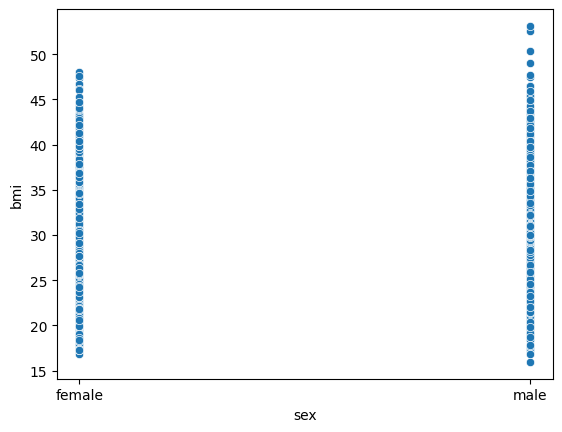

In [24]:
sns.scatterplot(x=df['sex'],y=df['bmi'])

#### Null Hypothesis : Tells that there is no significant relationship between Two variables (Just assumptions)

Alternate Hypothesis: Opposite of Null Hypothesis, tells that there is a relationship between two variables. (just assumptions)

p_value <= 0.5 null hypothesis is rejected otherwise alternate hypothesis is rejected.

In [30]:
H0='Gender has no effect on BMI'
Ha='Gender has an effect on BMI'
x=np.array(df[df['sex']=='male']['bmi'])
y=np.array(df[df['sex']=='female']['bmi'])
t_value,p_value=stats.ttest_ind(x,y)
#t-test is to identify the idfference between two numerical variable
if p_value<=0.05:
  print('{} since p-value {} <= 0.05'.format(Ha,p_value))
else:
  print('{} since p-value {} > 0.05'.format(H0,p_value))

Gender has no effect on BMI since p-value 0.08997637178984932 > 0.05


##### Is the proportion of smokers significantly different in different genders ?

In [31]:
freq_df = pd.crosstab(df['sex'],df['smoker'])
freq_df

smoker,no,yes
sex,,
female,547,115
male,517,159


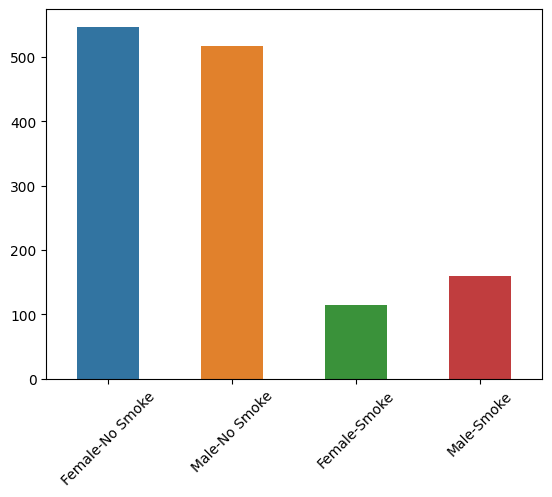

In [33]:
chances=['Female-No Smoke','Male-No Smoke','Female-Smoke','Male-Smoke']
counts=freq_df.loc[:,'no'].tolist()+freq_df.loc[:,'yes'].tolist()
sns.barplot(x=chances,y=counts,width=0.5)
plt.xticks(rotation=45)
plt.show()

In [34]:
from scipy.stats.distributions import chi2
H0 = "Gender has no effect on smoking habits"
Ha = "Gender has an effect on smoking habits"
chi,p_value,dof, expected = stats.chi2_contingency(freq_df)
#chi2 test is to identify the idfference between categorical variables

if p_value <= 0.05:
  print('{} since the p-value {} <= 0.05'.format(Ha,p_value))
else:
  print('{} since the p-value {} > 0.05'.format(H0,p_value))


Gender has an effect on smoking habits since the p-value 0.006548143503580696 <= 0.05


#### Is the distribution of BMI across women with no children, one child and two children etc, Are they same ?

In [36]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [39]:
H0 = "No. of children has no effect on BMI"
Ha = "No. of children has an effect on BMI"

female_df = df[df['sex'] =='female'].copy()

zero_child = female_df[female_df['children'] == 0]['bmi']
one_child = female_df[female_df['children'] == 1]['bmi']
two_child = female_df[female_df['children'] == 2]['bmi']
three_child = female_df[female_df['children'] == 3]['bmi']
four_child = female_df[female_df['children'] == 4]['bmi']
five_child = female_df[female_df['children'] == 5]['bmi']

f_stat, p_value=stats.f_oneway(zero_child,one_child,two_child,three_child,four_child,five_child)

The one-way ANOVA tests the null hypothesis that two or more groups have
the same population mean.  The test is applied to samples from two or
more groups, possibly with differing sizes.

In [40]:
if p_value <= 0.05:
  print('{} since the p_value {} <= 0.05'.format(Ha,p_value))
else:
  print('{} since the p_value {} > 0.05'.format(H0,p_value))

No. of children has no effect on BMI since the p_value 0.918622806533995 > 0.05
